In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')

In [2]:
simulations_names = [f'S{i}' for i in range(1,7) if i != 2]
simulations_sizes = ['35k', '100k', '300k', '600k', '1M']
best_n_folds = [5, 10, 5, 45, 60]
best_n_folds_ratio = [0.014, 0.01, 0.002, 0.008, 0.006]
best_sample_sizes_perc = [2, 0.5, 0.1, 2, 0.5]
best_sample_sizes_times = [18.38, 50.63, 74.37, 196.64, 234.16]
simulations_names = [x + f' ({y})' for x,y in zip(simulations_names, simulations_sizes)]

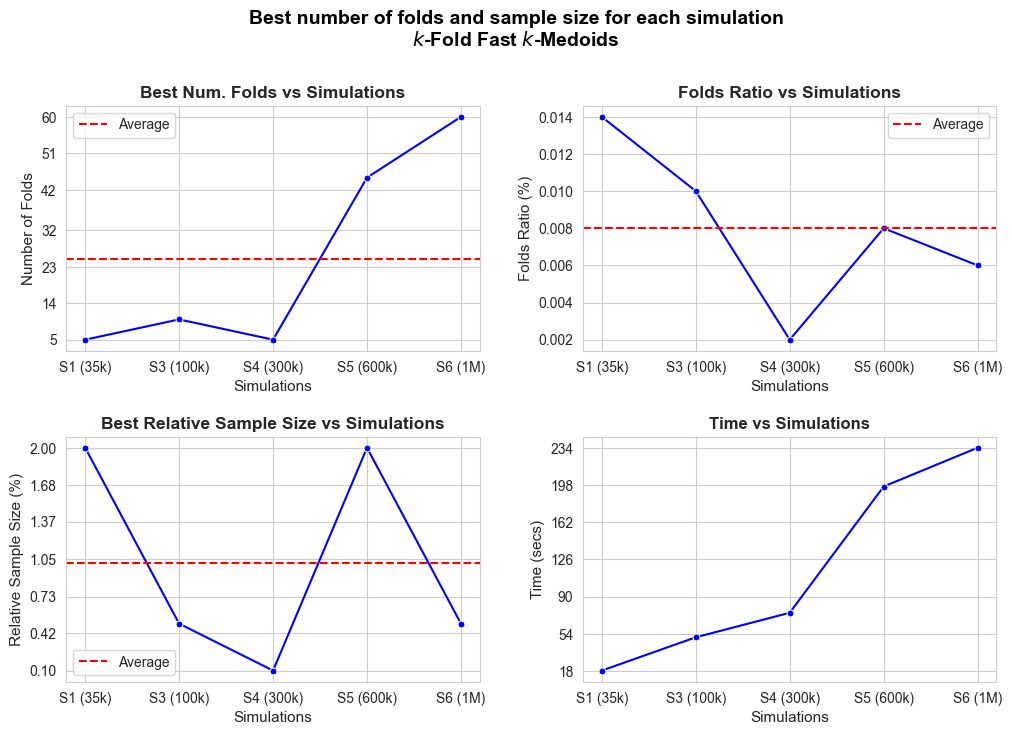

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))
axes = axes.flatten()  

sns.lineplot(x=simulations_names, y=best_n_folds, color='blue', marker='o',  markersize=5, ax=axes[0])
sns.lineplot(x=simulations_names, y=best_n_folds_ratio, color='blue', marker='o',  markersize=5, ax=axes[1])
sns.lineplot(x=simulations_names, y=best_sample_sizes_perc, color='blue', marker='o',  markersize=5, ax=axes[2])
sns.lineplot(x=simulations_names, y=best_sample_sizes_times, color='blue', marker='o', markersize=5, ax=axes[3])

axes[0].set_title('Best Num. Folds vs Simulations', size=12.5, weight='bold')
axes[0].set_ylabel('Number of Folds', size=11)
axes[0].set_yticks(np.round(np.linspace(np.min(best_n_folds), np.max(best_n_folds), 7),0))
axes[0].axhline(y=np.mean(best_n_folds), color='red', linestyle='--', label='Average')
axes[0].legend()

axes[1].set_title('Folds Ratio vs Simulations', size=12.5, weight='bold')
axes[1].set_ylabel('Folds Ratio (%)', size=11)
axes[1].set_yticks(np.round(np.linspace(np.min(best_n_folds_ratio), np.max(best_n_folds_ratio), 7),3))
axes[1].axhline(y=np.mean(best_n_folds_ratio), color='red', linestyle='--', label='Average')
axes[1].legend()

axes[2].set_title('Best Relative Sample Size vs Simulations', size=12.5, weight='bold')
axes[2].set_ylabel('Relative Sample Size (%)', size=11)
axes[2].set_yticks(np.round(np.linspace(np.min(best_sample_sizes_perc), np.max(best_sample_sizes_perc), 7),2))
axes[2].axhline(y=np.mean(best_sample_sizes_perc), color='red', linestyle='--', label='Average')
axes[2].legend()

axes[3].set_title('Time vs Simulations', size=12, weight='bold')
axes[3].set_ylabel('Time (secs)', size=11)
axes[3].set_yticks(np.round(np.linspace(np.min(best_sample_sizes_times), np.max(best_sample_sizes_times), 7),0))

for i in range(len(axes)):
    axes[i].set_xlabel('Simulations', size=11)

#plt.tight_layout()
plt.subplots_adjust(top=0.83)
plt.suptitle('Best number of folds and sample size for each simulation\n$k$-Fold Fast $k$-Medoids', fontsize=14, y=0.95, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.35, wspace=0.25) 

file_name = 'plots/kfold_kmedoids_simulation_best_sample_sizes'
fig.savefig(file_name + '.jpg', format='jpg', dpi=500, bbox_inches="tight", pad_inches=0.2)

plt.show()

Regarding number of folds:

- Data-sets with n\in [35k, 100k], a folds ratio in [0.01%, 0.014%]
- Data-sets with n< 35k, folds ration close to 0.014% but larger (the smaller n, the larger folds ration).
- Data-sets with n in (100, 1M], folds ratio in [0.002%, 0.008%].
- Data-sets with n > 1M, folds ratio close to 0.06% but lower (the larger n, the smaller folds ratio). 

Regarding sample size:

- There is no clear pattern. But size should be between [0.1%, 2%] for data with n \in [35k, 1M]
- For n < 35k, size close to 2% but greater. The smaller n, the larger size.
- For n > 1 M, size close to 0.5% but lower. The larger n, the smaller size.